In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


In [2]:
pip install --upgrade nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
#from keras.layers import Input, Embedding, LSTM, Dense
#from keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2024-05-15 16:58:41.469051: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 16:58:41.469155: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 16:58:41.625518: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
# Import necessary libraries
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Import necessary libraries
from keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential


In [5]:
from keras.layers import Conv1D
from keras.layers import Input, Embedding, LSTM, Dense, Activation, Dropout, Conv1D, Bidirectional
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, Activation, Dropout, Conv1D, Bidirectional


## Reading Data

In [6]:
column_names = ["target", "id", "date", "flag", "user", "text"]

# Read the CSV file with specified column names
df = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", 
                 encoding="ISO-8859-1", names=column_names)

In [7]:
df

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [8]:
data2 = df[["target","text"]]

## Take 10k Data with each class has 5k data

In [9]:
class_0_data = data2[data2['target'] == 0]
class_4_data = data2[data2['target'] == 4]

In [10]:
class_0_sample = class_0_data.sample(n=10000, random_state=42)
class_4_sample = class_4_data.sample(n=10000, random_state=42)

In [11]:
data = pd.concat([class_0_sample, class_4_sample])
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [12]:
data.shape

(20000, 2)

In [13]:
target_df = data['target'].value_counts().reset_index()

### Count of each class Samples

In [14]:
target_df

,target,count
0,4,10000
1,0,10000


### Visualization of Samples count of each class

In [15]:
fig = px.pie(target_df, values='count', names='target',title='Target Distribution')
fig.show()

## ### Making the taget class 4 to 1


In [16]:
data['target'][data['target']==4]=1


##  Understang the main words

In [17]:

# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", str(i))  # Convert to string before applying regex
        hashtags.append(ht)

    return hashtags


HT_regular = hashtag_extract(data['text'][data['target'] == 0])

HT_negative = hashtag_extract(data['text'][data['target'] == 1])

# unnesting list
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])


In [18]:
HT_regular

['momoams',
 'ipv6summit',
 'Bose',
 'iPhone',
 'fb',
 'fb',
 'Outdoors',
 'hhrs',
 'adlounge',
 'BEA09',
 'squarespace',
 'hamr',
 'fail',
 'e3',
 'iPhone',
 '3',
 'Australia',
 'stopthebnp',
 'origin',
 'QLD',
 'dinoberry',
 'squarespace',
 'trackle',
 'MSWindows',
 'iranelection',
 'firstrecord',
 'windows',
 'newyork',
 'KEVINJONAS',
 'KEVINJONAS',
 'KEVINJONAS',
 'KEVINJONAS',
 'KEVINJONAS',
 'KJ',
 'KJ',
 'iranelection',
 'sytycd',
 'unite',
 'artfire',
 'votehandmade',
 'etsy',
 'squarespace',
 'webdd',
 'fail',
 'itsucks',
 'BEAtwittyparty',
 'fb',
 'porridge',
 'toast',
 'GilmoreGirlsSunday',
 'toughlove',
 'MySQL',
 'dentc',
 'iranelection',
 'BSB',
 'fb',
 'terminator',
 'platformbiased',
 'iPhone',
 'apple',
 'iranelection',
 'MichelleObama',
 'BaliBelly',
 'e3',
 'tweetdeck',
 'iranelection',
 'summerschool',
 'Sadness',
 'yayman',
 'pre',
 'webos',
 'trackle',
 'IranElection',
 'inaperfectworld',
 'BSG',
 'bluray',
 'IranElection',
 'ASUS',
 'acre',
 'BB10',
 'Tweetie',
 

In [19]:
HT_negative

['followfriday',
 'FF',
 'ilove',
 'zenjar',
 'idol',
 'BrandonFlowers',
 'kfanyc',
 'web20',
 'prologue',
 'ChiTellMSFT',
 'jocorequests',
 'musiciangeekery',
 'nambu',
 'lions',
 'herebeforeoprah',
 'musicmonday',
 'NoUndiesSunday',
 'followfriday',
 'iamking',
 'ff',
 'coolshite',
 'smtb',
 'followfriday',
 '700',
 'voteforrob',
 'twittertourney',
 'Phish',
 'RedWings',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'rofl',
 '39',
 'suckmyhypotheticalballs',
 '3',
 'FullMoonCrazy',
 'honda',
 'fuzo',
 'eric',
 'followfriday',
 'raceforlife',
 'Follow',
 'bgt',
 '3',
 'TwitterTakeover',
 'flagstaff',
 'flg',
 '24',
 'db140',
 'twitterquitter',
 'followfriday',
 'iloveyou',
 'followfriday',
 'FNWC',
 'harpersglobe',
 'JobAngels',
 '4',
 'myweakess',
 'pl',
 'bgt',
 'jewelry',
 'jewellery',
 'jonaslive',
 'ifIknowwhatsgoodforme',
 'fletcherday',
 'Inappropriatemovies',
 'Mo

##  Non-Racist/Not Hate Tweets

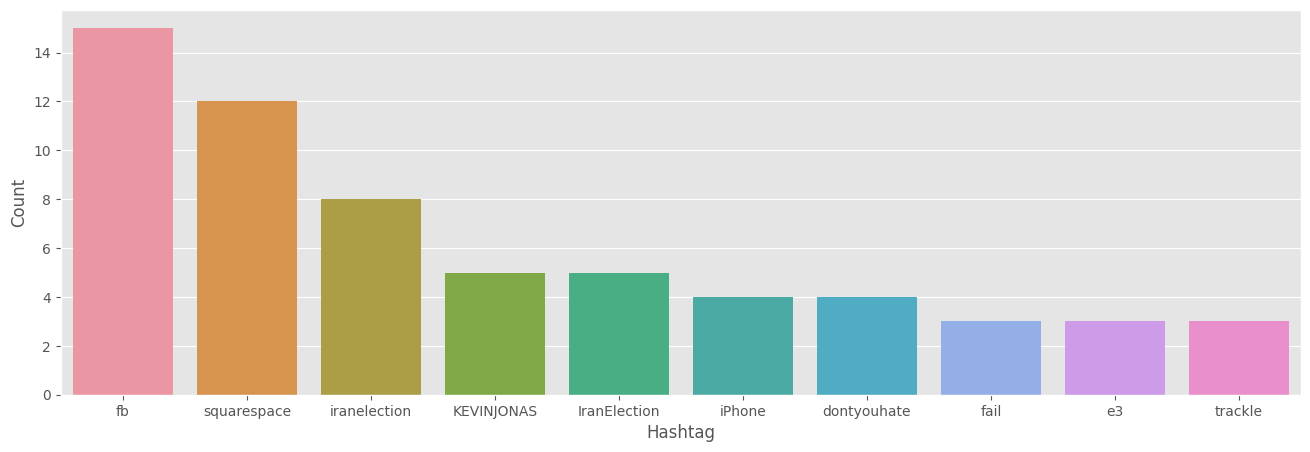

In [20]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Racist/Hate Tweets

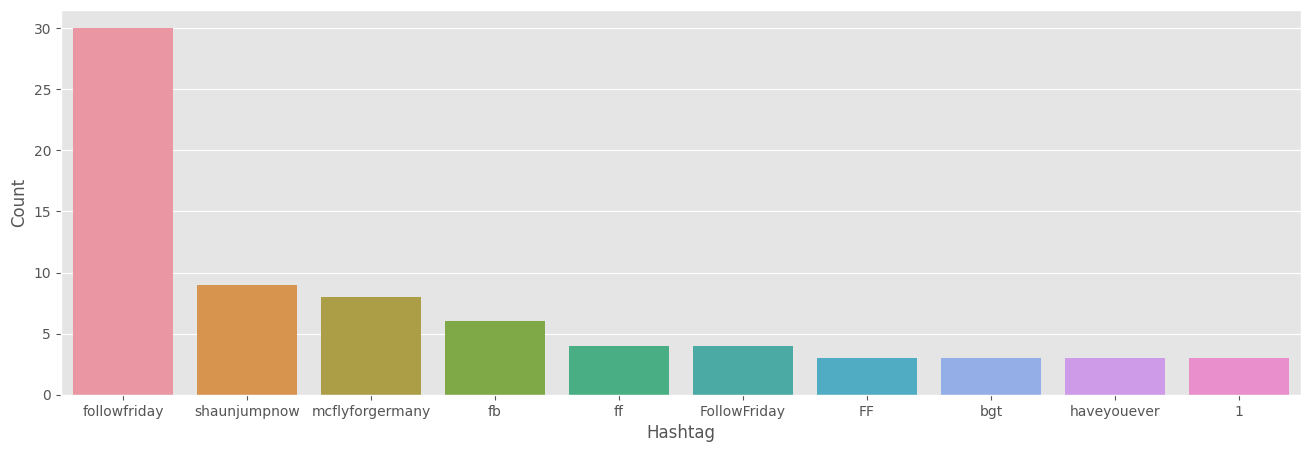

In [21]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Data Preprocessing

## Lower case

In [22]:
data['text']=data['text'].str.lower()

## Stop Word Removal

In [23]:
stopwords_list = stopwords.words('english')


In [24]:
STOPWORDS = set(stopwords_list)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [25]:
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))

In [26]:
data['text'].head()

0    @dawnrichard thanks luv...keep grind going (li...
1                     feel like watching life aquatic.
2    aparentally early morning erol died heart atta...
3            chopchop, get dressed! getting ready work
4                          @misshaleymae know baby ! x
Name: text, dtype: object

## Removing mails and urls


In [27]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

In [28]:
data['text']= data['text'].apply(lambda x: cleaning_email(x))
data['text'].head()

0      thanks luv...keep grind going (like know u w...
1                     feel like watching life aquatic.
2    aparentally early morning erol died heart atta...
3            chopchop, get dressed! getting ready work
4                                        know baby ! x
Name: text, dtype: object

In [29]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [30]:
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].head()

0      thanks luv...keep grind going (like know u w...
1                     feel like watching life aquatic.
2    aparentally early morning erol died heart atta...
3            chopchop, get dressed! getting ready work
4                                        know baby ! x
Name: text, dtype: object

## Remove Punctuations

In [31]:
english_punctuations = string.punctuation
english_punctuations



'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
def cleaning_punctuations(text):
    translator = str.maketrans('', '', english_punctuations)
    return text.translate(translator)

In [33]:
data['text'] = data['text'].apply(lambda text: cleaning_punctuations(text))


In [34]:
data['text'].head()

0      thanks luvkeep grind going like know u wills...
1                      feel like watching life aquatic
2    aparentally early morning erol died heart atta...
3              chopchop get dressed getting ready work
4                                         know baby  x
Name: text, dtype: object

## remove Numbers

In [35]:
# removing number

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [36]:
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].head()

0      thanks luvkeep grind going like know u wills...
1                      feel like watching life aquatic
2    aparentally early morning erol died heart atta...
3              chopchop get dressed getting ready work
4                                         know baby  x
Name: text, dtype: object

## tokenization

In [37]:
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)

In [38]:
data['text'].head()

0    [thanks, luvkeep, grind, going, like, know, u,...
1                [feel, like, watching, life, aquatic]
2    [aparentally, early, morning, erol, died, hear...
3       [chopchop, get, dressed, getting, ready, work]
4                                      [know, baby, x]
Name: text, dtype: object

## Lemmatization

In [39]:
def lemmatizer_on_text(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))

In [40]:
data['text'].head()

0    [thanks, luvkeep, grind, going, like, know, u,...
1                [feel, like, watching, life, aquatic]
2    [aparentally, early, morning, erol, died, hear...
3       [chopchop, get, dressed, getting, ready, work]
4                                      [know, baby, x]
Name: text, dtype: object

### Separating Target and Text Column

In [41]:
X=data.text
y=data.target

##  Plot a cloud of words for negative tweets


In [42]:
from wordcloud import WordCloud 

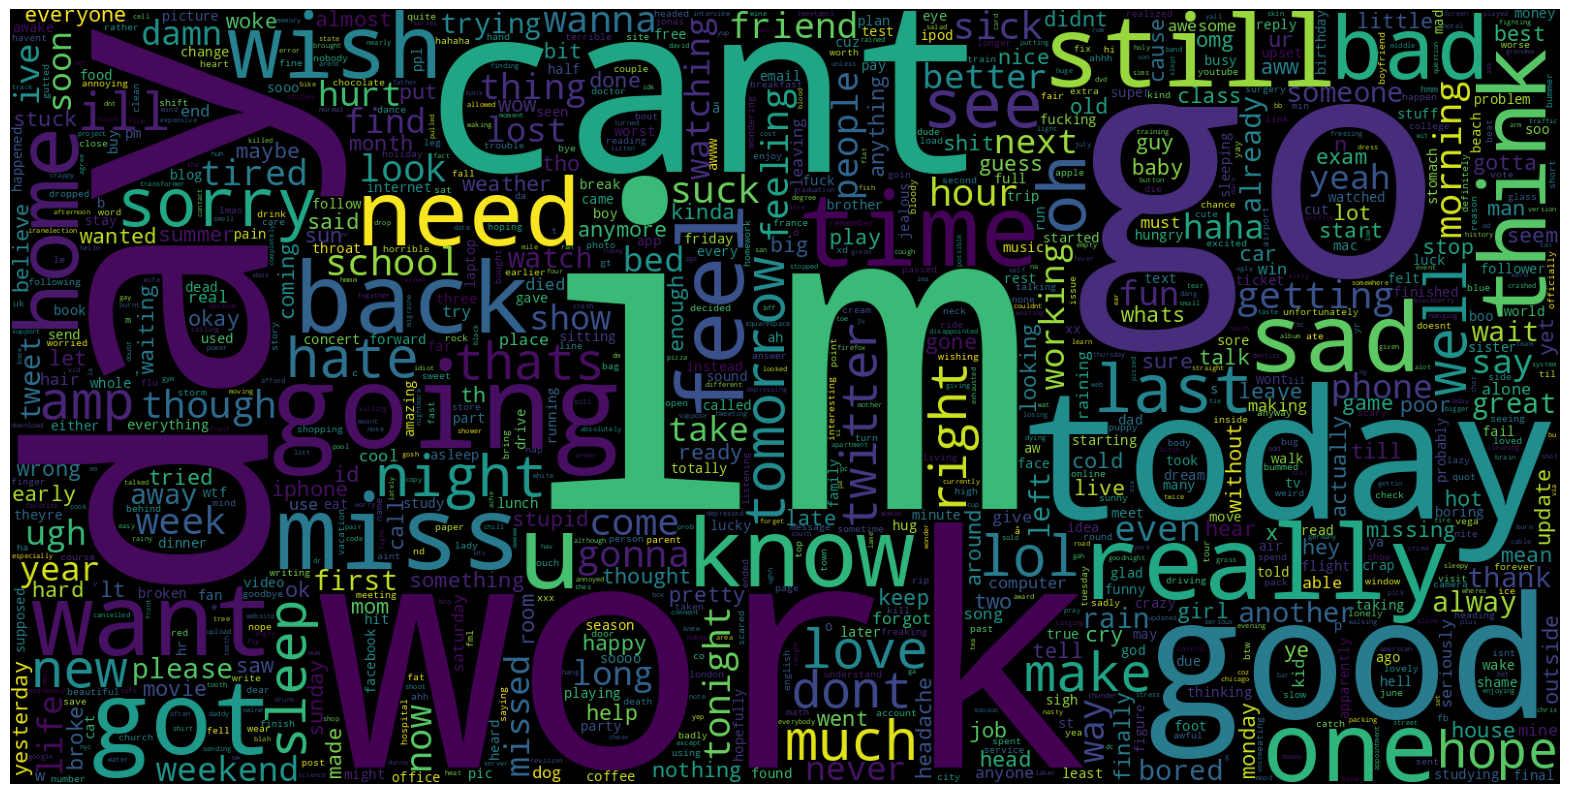

In [43]:
data_neg = data[data['target'] == 0]['text']  # Filter rows where label is equal to 1
data_neg_str = [" ".join(words) for words in data_neg]

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_neg_str))
plt.imshow(wc)
plt.axis("off")
plt.show()


##  cloud of words for positive tweets



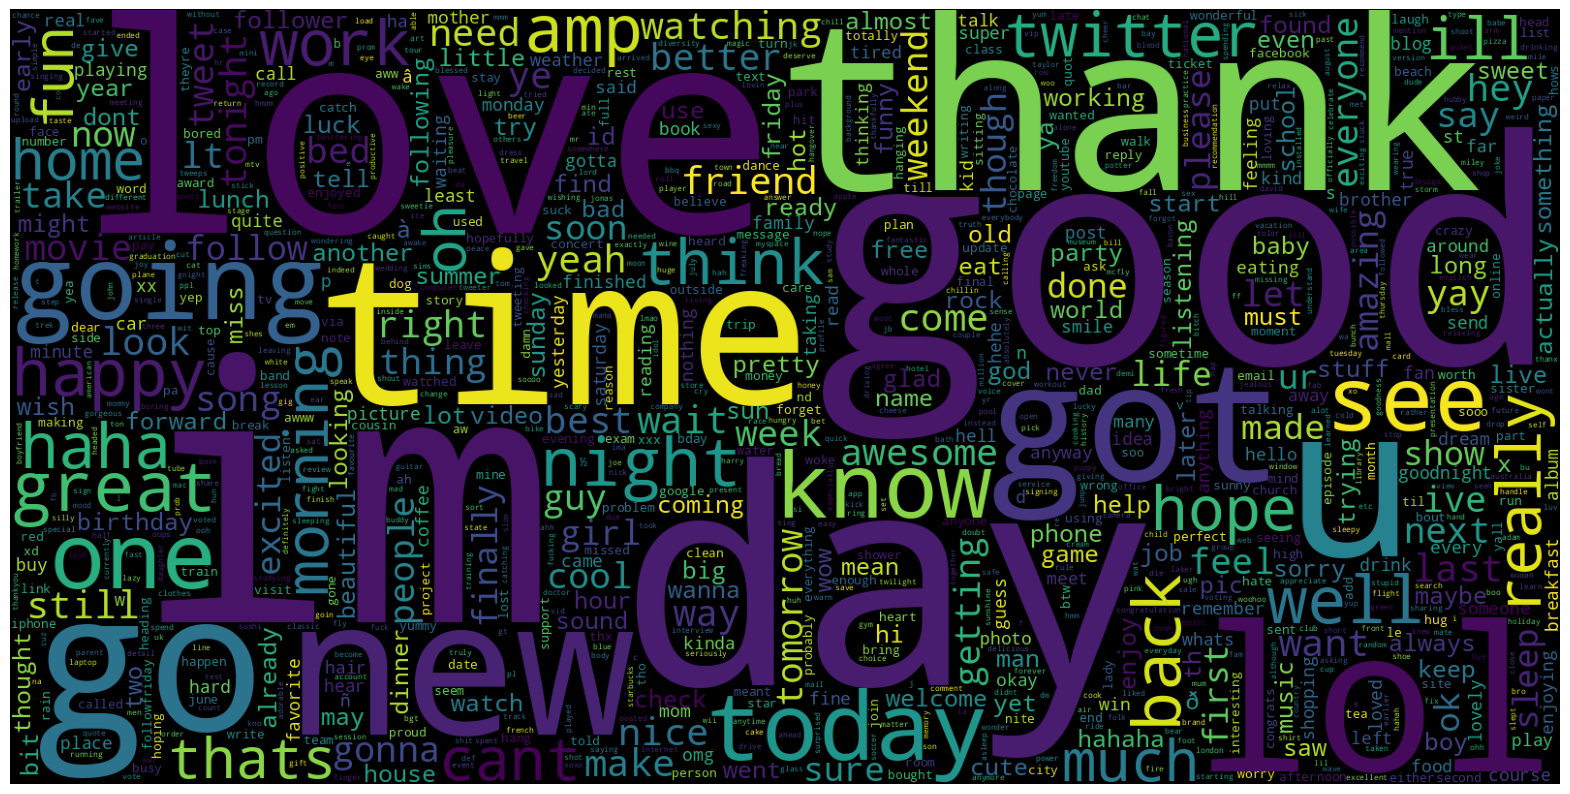

In [44]:
data_pos = data[data['target'] == 1]['text']  
data_pos_str = [" ".join(words) for words in data_pos]

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_pos_str))
plt.imshow(wc)
plt.axis("off")
plt.show()


## # Deep Learning Models

## LSTM

In [45]:
max_len_lstm  = 100
tok_lstm = Tokenizer()
tok_lstm .fit_on_texts(X)
sequences_lstm  = tok_lstm .texts_to_sequences(X)
sequences_matrix_lstm  = sequence.pad_sequences(sequences_lstm ,maxlen=max_len_lstm )

In [46]:
sequences_matrix_lstm .shape

(20000, 100)

In [47]:
X_train_lstm , X_test_lstm , Y_train_lstm , Y_test_lstm  = train_test_split(sequences_matrix_lstm , y, test_size=0.3, random_state=42,stratify=y)

In [48]:
# show the shape of data
print("Shape of X_train: ", X_train_lstm .shape)
print("Shape of X_test: ", X_test_lstm .shape)

Shape of X_train:  (14000, 100)
Shape of X_test:  (6000, 100)


## Model

In [49]:
def tensorflow_based_model(max_len_lstm): 
    inputs = Input(name='inputs',shape=[max_len_lstm])
    layer = Embedding(1000,100)(inputs) 
    layer = LSTM(64)(layer) 
    layer = Dense(256,name='FC1')(layer) 
    layer = Activation('relu')(layer) 
    layer = Dropout(0.5)(layer)
    layer = Dense(64,name='FC2')(layer) 
    layer = Activation('relu')(layer) 
    
    layer = Dense(1,name='out_layer')(layer) 
    layer = Activation('sigmoid')(layer) 
    model = Model(inputs=inputs,outputs=layer) 
    return model 


In [50]:
model_lstm = tensorflow_based_model(max_len_lstm)
model_lstm.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])


In [51]:
model_lstm.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 100)       │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC1 (Dense)                     │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC2 (Dense)                     │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out_layer (Dense)               │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,393 (685.13 KB)

 Trainable params: 175,393 (685.13 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history_lstm=model_lstm.fit(X_train_lstm,Y_train_lstm,batch_size=32,epochs=50, validation_split=0.3)

Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.5191 - loss: 0.6866 - val_accuracy: 0.6633 - val_loss: 0.6059
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.7105 - loss: 0.5571 - val_accuracy: 0.7069 - val_loss: 0.5595
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.7328 - loss: 0.5265 - val_accuracy: 0.7129 - val_loss: 0.5745
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.7488 - loss: 0.5032 - val_accuracy: 0.7052 - val_loss: 0.5684
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.7586 - loss: 0.4892 - val_accuracy: 0.7140 - val_loss: 0.5605
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.7776 - loss: 0.4690 - val_accuracy: 0.7114 - val_loss: 0.5627
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.7875 - loss: 0.4521 - val_accuracy: 0.7021 - val_loss: 0.5942
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.7886 - loss: 0.4309 - 

In [53]:
train_acc_lstm = model_lstm.evaluate(X_train_lstm, Y_train_lstm)

438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9429 - loss: 0.2120


In [54]:
test_accuracy_lstm = history_lstm.history['accuracy'][-1]
test_loss_lstm = history_lstm.history['loss'][-1]
print("Test Accuracy:", test_accuracy_lstm*100)
print("Test Loss:", test_loss_lstm*100)

Test Accuracy: 96.30612134933472
Test Loss: 8.463110774755478


## precision, recall, f1-score

In [55]:
Y_pred_lstm = model_lstm.predict(X_test_lstm)
Y_pred_classes_lstm = np.round(Y_pred_lstm)

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step


In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_lstm = precision_score(Y_test_lstm, Y_pred_classes_lstm)
recall_lstm = recall_score(Y_test_lstm, Y_pred_classes_lstm)
f1_lstm = f1_score(Y_test_lstm, Y_pred_classes_lstm)

print("Precision:", (precision_lstm*100))
print("Recall:", (recall_lstm*100))
print("F1-score:", (f1_lstm*100))

Precision: 92.67629858961128
Recall: 90.73333333333332
F1-score: 91.68952090739799


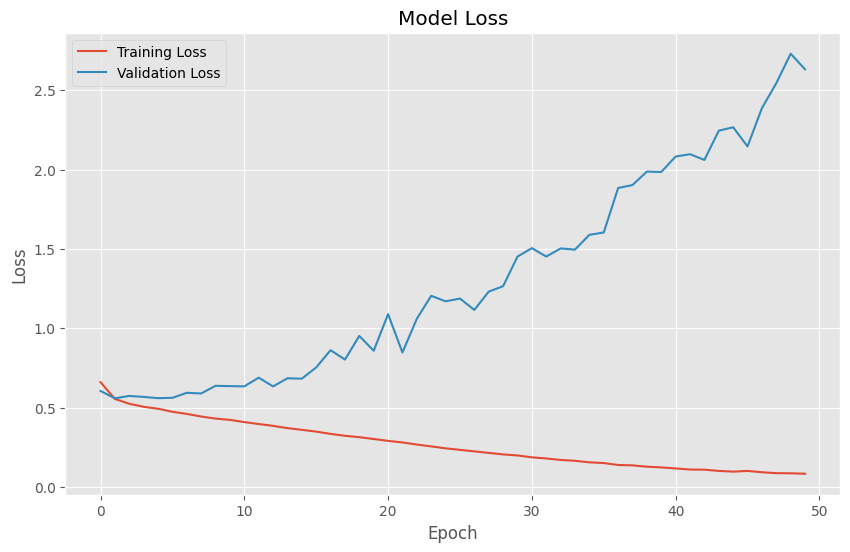

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Bilstm

In [58]:
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Activation, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

def tensorflow_based_bilstm_model(max_len_lstm):
    inputs = Input(name='inputs', shape=[max_len_lstm])
    layer = Embedding(1000, 100)(inputs)
    layer = Bidirectional(LSTM(64))(layer)
    layer = Dense(256, name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(64, name='FC2')(layer)
    layer = Activation('relu')(layer)
    layer = Dense(1, name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

model_bilstm = tensorflow_based_bilstm_model(max_len_lstm)
model_bilstm.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history_bilstm = model_bilstm.fit(X_train_lstm, Y_train_lstm, batch_size=32, epochs=50, validation_split=0.3)


Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 26s 72ms/step - accuracy: 0.5131 - loss: 0.6892 - val_accuracy: 0.6012 - val_loss: 0.6775
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 40s 70ms/step - accuracy: 0.7069 - loss: 0.5696 - val_accuracy: 0.7050 - val_loss: 0.5654
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - accuracy: 0.7384 - loss: 0.5183 - val_accuracy: 0.7190 - val_loss: 0.5545
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.7478 - loss: 0.5121 - val_accuracy: 0.7060 - val_loss: 0.6080
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.7559 - loss: 0.4954 - val_accuracy: 0.7164 - val_loss: 0.5742
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.7655 - loss: 0.4750 - val_accuracy: 0.7093 - val_loss: 0.5726
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.7842 - loss: 0.4535 - val_accuracy: 0.7100 - val_loss: 0.5891
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.7871 - loss: 0.4447 - 

In [59]:
model_bilstm.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 100, 100)       │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC1 (Dense)                     │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC2 (Dense)                     │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out_layer (Dense)               │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,036 (1.79 MB)

 Trainable params: 234,017 (914.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 234,019 (914.14 KB)

In [60]:
train_acc1_bilstm = model_bilstm.evaluate(X_train_lstm, Y_train_lstm)

438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9512 - loss: 0.2044


In [61]:
test_accuracy1_bilstm = history_bilstm.history['accuracy'][-1]
test_loss1_bilstm = history_bilstm.history['loss'][-1]
print("Validation Accuracy:", test_accuracy1_bilstm*100)
print("Validation Loss:", test_loss1_bilstm*100)

Validation Accuracy: 95.94898223876953
Validation Loss: 8.860868960618973


In [85]:
Y_pred1_bilstm = model_bilstm.predict(X_test_lstm)
Y_pred_classes1_bilstm = np.round(Y_pred1_bilstm)
from sklearn.metrics import precision_score, recall_score, f1_score
precision1_bilstm = precision_score(Y_test_lstm, Y_pred_classes1_bilstm)
recall1_bilstm = recall_score(Y_test_lstm, Y_pred_classes1_bilstm)
f11_bilstm = f1_score(Y_test_lstm, Y_pred_classes1_bilstm)

print("Precision:", (precision_lstm*100))
print("Recall:", (recall_lstm*100))
print("F1-score:", (f1_lstm*100))

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step
Precision: 93.44159858961127
Recall: 91.49863333333333
F1-score: 92.454820907398


## CNN

In [63]:
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

def tensorflow_based_cnn_model(max_len_cnn):
    inputs = Input(name='inputs', shape=[max_len_cnn])
    layer = Embedding(1000, 100)(inputs)
    layer = Conv1D(128, 5, activation='relu')(layer)
    layer = MaxPooling1D(5)(layer)
    layer = Conv1D(128, 5, activation='relu')(layer)
    layer = MaxPooling1D(5)(layer)
    layer = Flatten()(layer)
    layer = Dense(128, name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(64, name='FC2')(layer)
    layer = Activation('relu')(layer)
    layer = Dense(1, name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model
max_len_cnn = 100  
model_cnn = tensorflow_based_cnn_model(max_len_cnn)
model_cnn.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history_cnn = model_cnn.fit(X_train_lstm, Y_train_lstm, batch_size=32, epochs=50, validation_split=0.3)


Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.5043 - loss: 0.6934 - val_accuracy: 0.6226 - val_loss: 0.6568
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6603 - loss: 0.6234 - val_accuracy: 0.6807 - val_loss: 0.5936
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7411 - loss: 0.5245 - val_accuracy: 0.6769 - val_loss: 0.6002
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7794 - loss: 0.4614 - val_accuracy: 0.6036 - val_loss: 0.7882
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.8472 - loss: 0.3395 - val_accuracy: 0.6607 - val_loss: 0.7946
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.8912 - loss: 0.2522 - val_accuracy: 0.6533 - val_loss: 0.8933
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9167 - loss: 0.1879 - val_accuracy: 0.6502 - val_loss: 1.0052
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9197 - loss: 0.1755 - val_a

In [64]:
train_acc1_cnn = model_cnn.evaluate(X_train_lstm, Y_train_lstm)

438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9447 - loss: 0.3198


In [65]:
test_accuracy1_cnn = history_cnn.history['accuracy'][-1]
test_loss1_cnn = history_cnn.history['loss'][-1]
print("Validation Accuracy:", test_accuracy1_cnn*100)
print("Validation Loss:", test_loss1_cnn*100)

Validation Accuracy: 95.59183716773987
Validation Loss: 8.325667679309845


In [88]:
Y_pred1_cnn = model_cnn.predict(X_test_lstm)
Y_pred_classes1_cnn = np.round(Y_pred1_cnn)
from sklearn.metrics import precision_score, recall_score, f1_score
precision1_cnn = precision_score(Y_test_lstm, Y_pred_classes1_cnn)
recall1_cnn = recall_score(Y_test_lstm, Y_pred_classes1_cnn)
f11_cnn = f1_score(Y_test_lstm, Y_pred_classes1_cnn)

print("Precision:", (precision1_cnn*100))
print("Recall:", (recall1_cnn*100))
print("F1-score:", (f11_cnn*100))

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Precision: 91.84095543256626
Recall: 94.76666666666667
F1-score: 92.00341986631432


## RNN

In [67]:
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense, Activation, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

def tensorflow_based_rnn_model(max_len_rnn):
    inputs = Input(name='inputs', shape=[max_len_rnn])
    layer = Embedding(1000, 100)(inputs)
    layer = SimpleRNN(128, activation='relu')(layer)
    layer = Dense(128, name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(64, name='FC2')(layer)
    layer = Activation('relu')(layer)
    layer = Dense(1, name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

max_len_rnn = 100  # Define the maximum length of the input sequence
model_rnn = tensorflow_based_rnn_model(max_len_rnn)
model_rnn.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history_rnn = model_rnn.fit(X_train_lstm, Y_train_lstm, batch_size=32, epochs=50, validation_split=0.3)


Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.5391 - loss: 0.6803 - val_accuracy: 0.6507 - val_loss: 0.6222
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.7302 - loss: 0.5451 - val_accuracy: 0.6988 - val_loss: 0.5695
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.7613 - loss: 0.4984 - val_accuracy: 0.7071 - val_loss: 0.5669
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.7729 - loss: 0.4760 - val_accuracy: 0.7017 - val_loss: 0.5680
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.7918 - loss: 0.4354 - val_accuracy: 0.6957 - val_loss: 0.5935
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.8210 - loss: 0.3896 - val_accuracy: 0.7024 - val_loss: 0.6755
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8549 - loss: 0.3306 - val_accuracy: 0.6988 - val_loss: 0.7258
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.8713 - loss: 0.2945 - 

In [68]:
train_acc1_rnn = model_rnn.evaluate(X_train_lstm, Y_train_lstm)

438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9645 - loss: 0.2031


In [69]:
test_accuracy1_rnn = history_rnn.history['accuracy'][-1]
test_loss1_rnn = history_rnn.history['loss'][-1]
print("Validation Accuracy:", test_accuracy1_cnn*100)
print("Validation Loss:", test_loss1_cnn*100)

Validation Accuracy: 95.59183716773987
Validation Loss: 8.325667679309845


In [90]:
Y_pred1_rnn = model_cnn.predict(X_test_lstm)
Y_pred_classes1_rnn = np.round(Y_pred1_rnn)
from sklearn.metrics import precision_score, recall_score, f1_score
precision1_rnn = precision_score(Y_test_lstm, Y_pred_classes1_rnn)
recall1_rnn = recall_score(Y_test_lstm, Y_pred_classes1_rnn)
f11_rnn = f1_score(Y_test_lstm, Y_pred_classes1_rnn)

print("Precision:", (precision1_rnn*100))
print("Recall:", (recall1_rnn*100))
print("F1-score:", (f11_rnn*100))

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Precision: 92.38430043256626
Recall: 98.31001166666667
F1-score: 96.54676486631432


## ML

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


In [72]:
# Flatten the list of lists into a list of strings
tokenized_texts = [' '.join(tokens) for tokens in data['text']]

# Convert tokenized text to BoW features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tokenized_texts)

# Assuming df is your DataFrame with the target column modified
y = data['target']


In [73]:
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
logreg = LogisticRegression()
logreg.fit(X_train_ml, y_train_ml)
y_pred_logreg = logreg.predict(X_test_ml)

In [75]:
logreg = LogisticRegression()
logreg.fit(X_train_ml, y_train_ml)
y_pred_logreg = logreg.predict(X_test_ml)

In [76]:
accuracy_logreg = accuracy_score(y_test_ml, y_pred_logreg)
precision_logreg = precision_score(y_test_ml, y_pred_logreg)
recall_logreg = recall_score(y_test_ml, y_pred_logreg)
f1_logreg = f1_score(y_test_ml, y_pred_logreg)
print("Logistic Regression ")
print("Accuracy:",accuracy_logreg*100)
print("Precision:", precision_logreg*100)
print("Recall:", recall_logreg*100)
print("F1-score:", f1_logreg*100)

Logistic Regression 
Accuracy: 72.18333333333334
Precision: 70.336
Recall: 74.76190476190476
F1-score: 72.48145094806264


In [77]:
bnb_model = BernoulliNB()
bnb_model.fit(X_train_ml, y_train_ml)
y_pred_bnb_model = bnb_model.predict(X_test_ml)

In [78]:
accuracy_bnb = accuracy_score(y_test_ml,y_pred_bnb_model)
precision_bnb = precision_score(y_test_ml, y_pred_bnb_model)
recall_bnb = recall_score(y_test_ml, y_pred_bnb_model)
f1_bnb = f1_score(y_test_ml, y_pred_bnb_model)
print("Bernoulli Naive Bayes Classifier ")
print("Accuracy:",accuracy_bnb*100)
print("Precision:", precision_bnb*100)
print("Recall:", recall_bnb*100)
print("F1-score:", f1_bnb*100)

Bernoulli Naive Bayes Classifier 
Accuracy: 72.41666666666666
Precision: 71.08631440761405
Recall: 73.67346938775509
F1-score: 72.35677300818439


In [79]:
svm_model = SVC()
svm_model.fit(X_train_ml, y_train_ml)
Y_pred_svm = svm_model.predict(X_test_ml)

In [80]:
accuracy_svm = accuracy_score(y_test_ml, Y_pred_svm)
precision_svm = precision_score(y_test_ml, Y_pred_svm)
recall_svm = recall_score(y_test_ml, Y_pred_svm)
f1_svm = f1_score(y_test_ml, Y_pred_svm)
print("SVM ")
print("Accuracy:",accuracy_svm*100)
print("Precision:", precision_svm*100)
print("Recall:", recall_svm*100)
print("F1-score:", f1_svm*100)

SVM 
Accuracy: 71.81666666666666
Precision: 68.91850954256286
Recall: 77.38095238095238
F1-score: 72.90498317577313


In [81]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train_ml, y_train_ml)
Y_pred_xgb = xgb_model.predict(X_test_ml)

In [82]:
accuracy_xgb = accuracy_score(y_test_ml, Y_pred_xgb)
precision_xgb = precision_score(y_test_ml, Y_pred_xgb )
recall_xgb = recall_score(y_test_ml, Y_pred_xgb )
f1_xgb  = f1_score(y_test_ml, Y_pred_xgb )
print("Logistic Regression ")
print("Accuracy:",accuracy_xgb *100)
print("Precision:", precision_xgb *100)
print("Recall:", recall_xgb *100)
print("F1-score:", f1_xgb *100)

Logistic Regression 
Accuracy: 70.46666666666667
Precision: 66.15938018815717
Recall: 81.3265306122449
F1-score: 72.96307598413182


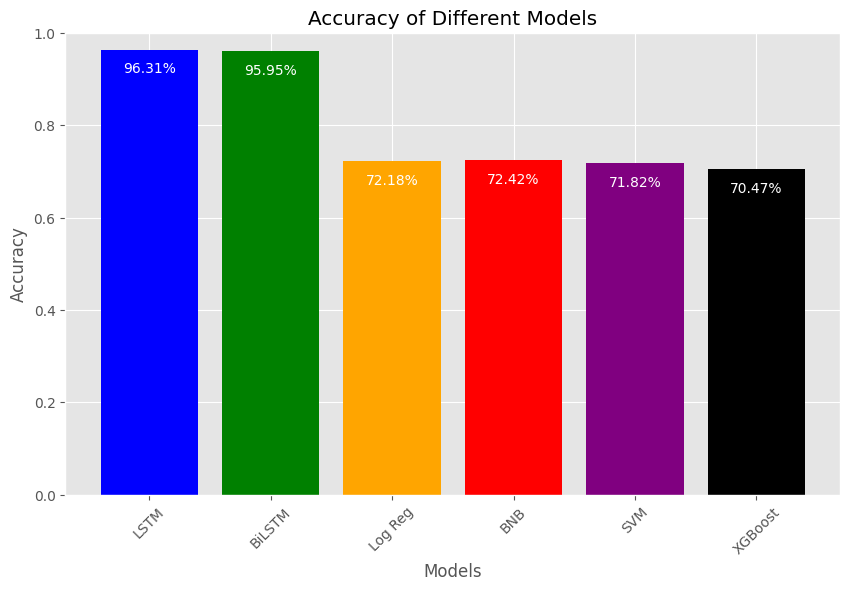

In [83]:
import matplotlib.pyplot as plt

# Accuracy values of the six models
accuracies = [test_accuracy_lstm,test_accuracy1_bilstm,accuracy_logreg,accuracy_bnb,accuracy_svm, accuracy_xgb]

# Labels for the models
models = ['LSTM','BiLSTM','Log Reg','BNB','SVM' ,'XGBoost']

# Plotting the accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'purple', 'black'])
plt.title('Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Assuming accuracies are between 0 and 1

# Adding horizontal lines with the accuracy values
for bar, acc in zip(bars, accuracies):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f"{acc*100:.2f}%", 
                   ha='center', color='white', fontsize=10)

plt.show()